<a href="https://colab.research.google.com/github/bjungweapon/mjc.ai.ml/blob/BDU/BDU.animation.8.3.SVM.titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


SVM ( Support Vector Machine)

( 패턴인식, 자료분석 )에서 기 활용되어 온 알고리즘

 . 두 카테고리 중 어느 하나에 속한 데이터의 집합이 주어 졌을 때 SVM 알고리즘은 주어진 데이터 집합을 바탕으로 하여 새로운 데이터가 어느 카테고리에 속할지 판단하는 **비 확률적 이진 선형 분류 모델**

 . 만들어진 분류 모델은 데이터가 사상된 공간 (mapping된 공간) 에서 경계로 표현되는 SVM 알고리즘은 그 중 가장 큰 폭을 가진 경계를 찾는 알고리즘

  . 경계선에서 멀리 떨어진 것이 정확도가 높다는 것.


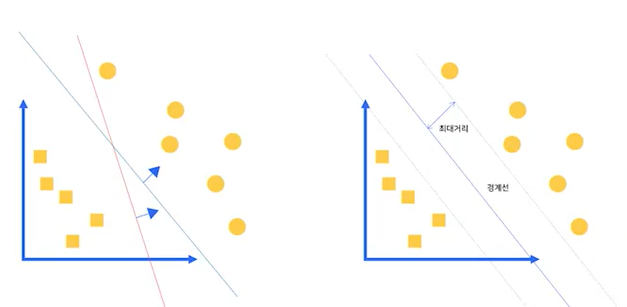

 두 그룹을 분류하는 경계선은 최대한 두 그룹에서 멀리 떨어져 있는 경계선을 구하게 되고,

 이는 두 그룹과의 거리 (margin)를 최대로 만드는 것이 나중에 입력된 데이터를 분류할 때, 더 높은 정확도를 얻을 수 있다.  (경계의 명확화)

 - 결정 경계  ( Decision Surface )
   변수의 객수가 적을 때 ( ex: 이전 분류) 정확히 경계면을 나날 수 있다.
   

  .SVM 을 이용한 titanic data를 할 때.

    무엇을 하려는 것인가 ?

    [ 접근 방법]
       . titaic는 다양한 독립 변수를 기반으로 Survived 라는 종속 변수을 예측.  (이것이 목적이다. 즉 살았나/죽었나를 살펴 봄)

       . 불필요한 속성은 제거하고  (전처리 과정), SVM 알고리즘을 이용하여 학습 모델을 구축한 후 예측을 수행.

       . 성별 (Sex)와 Embarked 에 대해서는 One-Hot - Encoding으로 Label 분리

       . 학습 data와 데스트 data를 7:3 비율로 구성해서 검증하고,
       . classification_report()의 의미를 이해한다.

   . 하려는 것

> 인용구 추가 :  " SVM 을 이용한 타이타닉 생존자 분류 (예측) 분석 수행



In [20]:
# @title
import pandas as pd
import numpy as np
import matplotlib as plt

from sklearn import svm

from sklearn.model_selection import train_test_split

In [21]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [22]:
df
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(891, 12)

In [23]:

## 기술 통계를 학인
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:

## 평균값
d_mean = df["Age"].mean()
df["Age"].fillna(d_mean, inplace=True)

## 최빈값
d_mode = df["Embarked"].mode()[0]
df["Embarked"].fillna(d_mode, inplace=True)

## 파생 변수 생성
df["FamilySize"] = df["SibSp"] + df["Parch"]

<ipython-input-24-bce66ae1750f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(d_mean, inplace=True)
<ipython-input-24-bce66ae1750f>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

In [25]:
## one hot encoding  vs.  label encoding
## 지금은 one hot encoding 방식을 사용해 보자.

 레이블 인코딩과  원-핫 인코딩   

인코딩 :  문자를 숫자로 할당해 주는 방법

1. label 인코딩
  : 알파벳 순서로 숫자를 할당해 주는 방법
  : 숫자값을 가중치로 잘못 인식할 수 있는 문제가 있어  선형 회귀에서는 사용하지 않는다.

  2. one-hot-encoding
     : 가변수(가짜 변수)를 이용하여  컬럼값에 대해서 새로운 컬럼으로 만든다.
     : 해당되는 변수에  1로 두고, 나머지는 0 으로 두는 방식으로 컬럼을 분류한다.

In [26]:
### one-hot encoding

#sex 컬럼의 값을 1과 0 으로 원-핫 인코딩 한다.
onehot_sex = pd.get_dummies(df["Sex"])   ## 가짜 변수를 생성
df = pd.concat([df, onehot_sex], axis = 1) ## object value 이름으로 새로운 컬럼 field 생성

#Embarked 컬럼의 값을 원-핫 인코딩 한다.
onehot_embarked = pd.get_dummies(df["Embarked"])
df = pd.concat([df, onehot_embarked], axis=1)  ## object value 이름으로 새로운 컬럼 field 생성



In [27]:
onehot_sex

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [28]:
onehot_embarked

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [29]:
X = df[["Pclass", "Age", "Fare", "FamilySize","female", "male", "C", "Q", "S"]]   # cabin, ticket을 뺀다.  text는 영향성이 없다고 사전 판단.
y = df ["Survived"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 9)
(268, 9)
(623,)
(268,)


In [31]:
#SVM 객체 생성
sv = svm.SVC(kernel='rbf')  # kernel의 종류:linear, poly rbf ...,, 어떤 kernel를 사용할 것인지 결정.  rbf 가 default. (linear, poly, sigmoid)
                            ## kernel의 값을 변경하면서 성능을 평가할 수 있다.
# sv = svm.SVC(kernel='rbf', C=1, gamma=0.1)  # C 비용 , gamma : 허용 ㅍ준 편차   ... 경계선을 조정할 때 사용.  변경하면서 해 보자.
sv.fit(X_train, y_train)

SVC()

In [32]:
pred = sv.predict(X_test)  ## 예측 수행

In [33]:
pred = sv.predict(X_test)
pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0])

In [34]:
## 모델 성능 - 정확도 측정

In [35]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(acc)

0.7238805970149254


 (*) 0.72 라는 값은 그렇게 나쁘지도 , 좋지도 않은 결과 임을 알 수 있다.

In [36]:
## 모델 성능 평가 - Confusion Matrix 계산

In [37]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pred)   ##실제 분류가 어떻게 되었을 까?
print(mat)

[[167   7]
 [ 67  27]]


위 confusion matrix의 결과를 해석이 가능해야 한다.
Positive True,  Negative False , Positive False, Negative True.

대각선 (단위 행렬)의 잘 나와야 한다.


In [38]:
## 평가 지표 계산
from sklearn.metrics import classification_report
rpt = classification_report(y_test, pred)
print(rpt)

              precision    recall  f1-score   support

           0       0.71      0.96      0.82       174
           1       0.79      0.29      0.42        94

    accuracy                           0.72       268
   macro avg       0.75      0.62      0.62       268
weighted avg       0.74      0.72      0.68       268



 f1-socre 에서  0 (미 생존자)를 판단하는 것은  0.82 로 높은 확률이나,
 1 (생존자)를 판단하는 것은 0.42 로 낮으므로,

 생존자 보다는 미 생존자를 예측하는 모델로 사용하는 것이 좋겠다.


 ( 도전 과제 )

    - 커널의 종류와 커널 파라미터를 변경하고, 성능을 비교하는 것이 좋겠다.
      ex)  sv = svm.SVC ( kernel = "linear",  C = 1, gamma = 0.1

      등.   C (비용)과 gamma (허용 표준편차)를 조절해서 마진의 크기를 조절할 수 있다.

##  코드는 SVM의 결정 경계(decision boundary)가 어떻게 형성되는지, 그리고 마진(margin)이 어떻게 최대화되는지를 보여주는 애니메이션을 생성할 것입니다. 특히 타이타닉 데이터셋의 특성 중 가장 중요한 두 가지(나이와 요금)를 사용하여 2D 공간에서 시각화


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# 데이터 로딩
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# 필요한 열 선택 및 결측치 처리
df = df[['Survived', 'Pclass', 'Sex', 'Age']]
df.dropna(inplace=True)

# 범주형 변수 인코딩
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

# 특성과 타겟 분리
X = df[['Pclass', 'Sex', 'Age']]
y = df['Survived']

# 특성 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 훈련 및 테스트 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [2]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.svm import SVC

# 2D 시각화를 위해 두 개의 특성 선택
X_vis = X_train[:, :2]  # Pclass와 Sex
y_vis = y_train

# SVM 모델 초기화
model = SVC(kernel='linear', C=1.0)

# 애니메이션 초기화
fig, ax = plt.subplots()
plt.close()  # Colab에서 중복 출력 방지

# 결정 경계 그리기 함수
def plot_decision_boundary(clf, X, y, ax):
    ax.clear()
    # 산점도
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    # 결정 경계
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 200),
                         np.linspace(ylim[0], ylim[1], 200))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
    ax.set_xlabel('Pclass')
    ax.set_ylabel('Sex')
    ax.set_title('SVM Decision Boundary')

# 애니메이션 업데이트 함수
def update(frame):
    # 점진적으로 더 많은 데이터를 사용하여 모델 학습
    idx = int(len(X_vis) * (frame + 1) / 10)
    model.fit(X_vis[:idx], y_vis[:idx])
    plot_decision_boundary(model, X_vis, y_vis, ax)

# 애니메이션 생성
anim = FuncAnimation(fig, update, frames=10, interval=500)

# Colab에서 애니메이션 표시
from IPython.display import HTML
HTML(anim.to_jshtml())


두번째 animation ( claudi )

In [1]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
for font_path in font_list:
    fp = fm.FontProperties(fname=font_path)
    try:
        print(f"{fp.get_name()} - {font_path}")
    except RuntimeError:
        pass

Liberation Serif - /usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf
Liberation Mono - /usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf
Liberation Serif - /usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf
Liberation Sans Narrow - /usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf
Liberation Sans - /usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf
Liberation Sans Narrow - /usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf
Humor Sans - /usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf
Liberation Sans - /usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf
Liberation Serif - /usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf
Liberation Mono - /usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf
Liberation Sans - /usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf
Liberation Sans Narrow - /usr/share/fonts/truetype/liberation/LiberationSansNarrow-It

In [2]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126101 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

In [3]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
for font_path in font_list:
    fp = fm.FontProperties(fname=font_path)
    try:
        print(f"{fp.get_name()} - {font_path}")
    except RuntimeError:
        pass


NanumGothicCoding - /usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf
Nanum Pen Script - /usr/share/fonts/truetype/nanum/NanumPen.ttf
NanumSquareRound - /usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf
NanumSquare_ac - /usr/share/fonts/truetype/nanum/NanumSquare_acB.ttf
Humor Sans - /usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf
Liberation Mono - /usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf
NanumGothic - /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumSquare - /usr/share/fonts/truetype/nanum/NanumSquareL.ttf
NanumGothic - /usr/share/fonts/truetype/nanum/NanumGothicLight.ttf
NanumMyeongjo Eco - /usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf
Liberation Sans Narrow - /usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf
Liberation Mono - /usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf
NanumGothic Eco - /usr/share/fonts/truetype/nanum/NanumGothicEcoR.ttf
Liberation Sans Narrow - /usr/share/fonts/truet

In [14]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.font_manager as fm

##fm._rebuild()
plt.rcParams['font.family'] = 'NanumGothic ' # 또는 다른 나눔 폰트


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
from matplotlib.animation import FuncAnimation
from matplotlib.colors import ListedColormap
from IPython.display import HTML
import matplotlib.animation as animation
from sklearn.decomposition import PCA

# 타이타닉 데이터셋 불러오기
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# 데이터 전처리
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# 범주형 데이터 인코딩
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_dummies], axis=1)
df = df.drop('Embarked', axis=1)

# 타겟 변수와 특성 분리
X = df.drop('Survived', axis=1)
y = df['Survived']

# 교육용 시각화를 위해 가장 중요한 특성 2개만 선택 (Age와 Fare)
X_selected = X[['Age', 'Fare']]

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


<ipython-input-16-ee60e8994ba2>:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
<ipython-input-16-ee60e8994ba2>:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
<ipython-input-16-ee60e8994ba2>:101: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  ani.save('svm_animation.html', writer=html_animation)
<ipython-input-16-ee60e8994ba2>:101: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  ani.save('svm_animation.html', writer=html_animation)
<ipython-input-16-ee60e8994ba2>:101: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  ani.save('svm_animation.html', writer=html

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7d9c3e5c6f20> (for post_execute):


KeyboardInterrupt: 

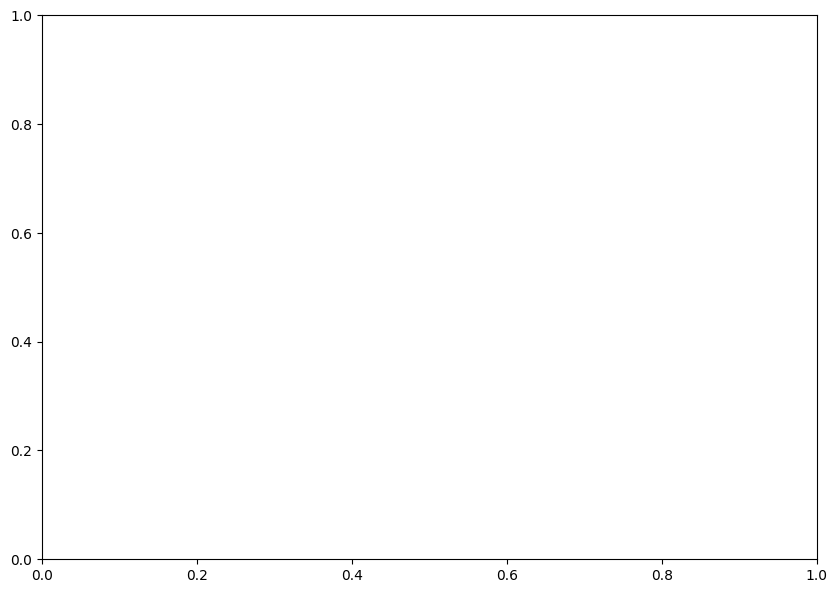

In [16]:

# SVM 모델 생성 함수
def create_svm_model(C_value, kernel_type='linear'):
    model = SVC(C=C_value, kernel=kernel_type, gamma='auto')
    model.fit(X_train, y_train)
    return model

# 결정 경계 시각화 함수
def plot_decision_boundary(ax, model, X, y, h=0.02):
    # 메쉬 그리드 설정
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # 메쉬 그리드 포인트에서의 예측 계산
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 결정 경계 플롯
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    ax.contour(xx, yy, Z, colors='k', linestyles=['-'], linewidths=2)

    # 데이터 포인트 플롯
    for label_idx, marker, color in zip([0, 1], ['x', 'o'], ['blue', 'red']):
        ax.scatter(
            X[y == label_idx, 0], X[y == label_idx, 1],
            c=color, marker=marker, s=50, edgecolors='k', alpha=0.7,
            label=f'{"사망" if label_idx == 0 else "생존"}'
        )

    # 서포트 벡터 표시
    if hasattr(model, 'support_vectors_'):
        ax.scatter(
            model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=100, linewidth=1, facecolors='none', edgecolors='green',
            label='서포트 벡터'
        )

    # 그래프 설정
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('나이 (스케일링됨)')
    ax.set_ylabel('요금 (스케일링됨)')
    ax.set_title(f'SVM (C={model.C})')
    ax.legend(loc='upper right')

# C 값에 따른 SVM 모델 변화 애니메이션
fig, ax = plt.subplots(figsize=(10, 8))
plt.subplots_adjust(bottom=0.2)

# 애니메이션을 위한 C 값 범위
C_values = np.logspace(-2, 2, 20)

# 초기 텍스트 객체
text = ax.text(0.02, 0.02, '', transform=ax.transAxes, fontsize=12,
               bbox=dict(facecolor='white', alpha=0.8))

# 애니메이션 함수
def update(frame):
    ax.clear()
    C = C_values[frame]

    # 현재 C 값으로 SVM 모델 생성
    model = create_svm_model(C)

    # 결정 경계 시각화
    plot_decision_boundary(ax, model, X_train, y_train)

    # 모델 성능 계산
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    # 성능 정보 텍스트 업데이트
    info_text = f'C: {C:.2f}\n'
    info_text += f'학습 정확도: {train_acc:.2f}\n'
    info_text += f'테스트 정확도: {test_acc:.2f}\n'
    info_text += f'서포트 벡터 개수: {len(model.support_vectors_)}'

    text = ax.text(0.02, 0.02, info_text, transform=ax.transAxes, fontsize=12,
                  bbox=dict(facecolor='white', alpha=0.8))

    # 마진 설명 추가
    title_text = f'SVM 결정 경계 (C={C:.2f})'
    if C < 0.1:
        title_text += " - 큰 마진, 약한 규제 (underfitting 위험)"
    elif C > 10:
        title_text += " - 작은 마진, 강한 규제 (overfitting 위험)"
    else:
        title_text += " - 균형 잡힌 마진"

    ax.set_title(title_text)

    return ax, text

# 애니메이션 생성
ani = FuncAnimation(fig, update, frames=len(C_values), interval=500, blit=False)

# HTML로 변환하여 Colab에서 재생 가능하게 함
html_animation = animation.HTMLWriter(fps=2)
ani.save('svm_animation.html', writer=html_animation)
HTML(ani.to_jshtml())

# 커널 변화에 따른 SVM 애니메이션
fig2, ax2 = plt.subplots(figsize=(10, 8))
plt.subplots_adjust(bottom=0.2)

# 다양한 커널 사용
kernels = ['linear', 'poly', 'rbf']
titles = ['선형 커널', '다항식 커널', 'RBF 커널']

# 초기 텍스트 객체
text2 = ax2.text(0.02, 0.02, '', transform=ax2.transAxes, fontsize=12,
               bbox=dict(facecolor='white', alpha=0.8))

# 커널 애니메이션 함수
def update_kernel(frame):
    ax2.clear()
    kernel_idx = frame % len(kernels)
    kernel = kernels[kernel_idx]
    title = titles[kernel_idx]

    # C 값은 균형 잡힌 값 사용
    model = SVC(C=1.0, kernel=kernel, gamma='auto')
    model.fit(X_train, y_train)

    # 결정 경계 시각화
    plot_decision_boundary(ax2, model, X_train, y_train)

    # 모델 성능 계산
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    # 성능 정보 텍스트 업데이트
    info_text = f'커널: {title}\n'
    info_text += f'학습 정확도: {train_acc:.2f}\n'
    info_text += f'테스트 정확도: {test_acc:.2f}\n'

    if hasattr(model, 'support_vectors_'):
        info_text += f'서포트 벡터 개수: {len(model.support_vectors_)}'

    text2 = ax2.text(0.02, 0.02, info_text, transform=ax2.transAxes, fontsize=12,
                   bbox=dict(facecolor='white', alpha=0.8))

    # 커널 특성 설명
    kernel_explanation = ""
    if kernel == 'linear':
        kernel_explanation = "선형 커널: 직선 결정 경계로 간단한 분류 문제에 적합"
    elif kernel == 'poly':
        kernel_explanation = "다항식 커널: 비선형 결정 경계로 복잡한 패턴 포착 가능"
    elif kernel == 'rbf':
        kernel_explanation = "RBF 커널: 매우 유연한 결정 경계로 복잡한 데이터에 적합"

    ax2.set_title(f'SVM {title} (C=1.0)\n{kernel_explanation}')

    return ax2, text2

# 커널 애니메이션 생성
ani2 = FuncAnimation(fig2, update_kernel, frames=9, interval=1000, blit=False)

# HTML로 변환
html_animation2 = animation.HTMLWriter(fps=1)
ani2.save('svm_kernel_animation.html', writer=html_animation2)
HTML(ani2.to_jshtml())

# 추가: 전체 특성에 대한 PCA 시각화와 SVM
# 더 많은 특성을 포함시켜 PCA로 축소하여 시각화
numerical_cols = ['Age', 'Fare', 'Sex', 'Pclass', 'SibSp', 'Parch']
X_more = X[numerical_cols]
X_more_scaled = scaler.fit_transform(X_more)

# PCA 적용하여 2차원으로 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_more_scaled)

# PCA 변환된 데이터로 학습/테스트 분할
X_pca_train, X_pca_test, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# PCA 데이터에 대한 SVM 애니메이션
fig3, ax3 = plt.subplots(figsize=(10, 8))
plt.subplots_adjust(bottom=0.2)

# 초기 텍스트 객체
text3 = ax3.text(0.02, 0.02, '', transform=ax3.transAxes, fontsize=12,
               bbox=dict(facecolor='white', alpha=0.8))

# PCA 애니메이션 함수
def update_pca(frame):
    ax3.clear()
    C = C_values[frame]

    # 현재 C 값으로 SVM 모델 생성
    model = SVC(C=C, kernel='rbf', gamma='auto')
    model.fit(X_pca_train, y_train_pca)

    # 결정 경계 시각화
    plot_decision_boundary(ax3, model, X_pca_train, y_train_pca)

    # 모델 성능 계산
    y_train_pred = model.predict(X_pca_train)
    y_test_pred = model.predict(X_pca_test)
    train_acc = accuracy_score(y_train_pca, y_train_pred)
    test_acc = accuracy_score(y_test_pca, y_test_pred)

    # 성능 정보 텍스트 업데이트
    info_text = f'C: {C:.2f} (PCA 적용 데이터)\n'
    info_text += f'학습 정확도: {train_acc:.2f}\n'
    info_text += f'테스트 정확도: {test_acc:.2f}\n'

    if hasattr(model, 'support_vectors_'):
        info_text += f'서포트 벡터 개수: {len(model.support_vectors_)}'

    text3 = ax3.text(0.02, 0.02, info_text, transform=ax3.transAxes, fontsize=12,
                   bbox=dict(facecolor='white', alpha=0.8))

    ax3.set_xlabel('첫 번째 주성분')
    ax3.set_ylabel('두 번째 주성분')
    ax3.set_title(f'PCA 축소 데이터에 대한 SVM (C={C:.2f})')

    return ax3, text3

# PCA 애니메이션 생성
ani3 = FuncAnimation(fig3, update_pca, frames=len(C_values), interval=500, blit=False)

# HTML로 변환
html_animation3 = animation.HTMLWriter(fps=2)
ani3.save('svm_pca_animation.html', writer=html_animation3)
HTML(ani3.to_jshtml())

# 추가 - SVM 하이퍼파라미터 튜닝 과정을 보여주는 애니메이션
fig4, ax4 = plt.subplots(figsize=(12, 10))
plt.subplots_adjust(bottom=0.15)

# C와 gamma를 함께 조정
C_values_tune = np.logspace(-2, 2, 5)
gamma_values = np.logspace(-3, 1, 5)

# 모든 조합 생성
param_combinations = [(c, g) for c in C_values_tune for g in gamma_values]

# 초기 텍스트 객체
text4 = ax4.text(0.02, 0.02, '', transform=ax4.transAxes, fontsize=12,
               bbox=dict(facecolor='white', alpha=0.8))

# 하이퍼파라미터 튜닝 애니메이션 함수
def update_hyperparams(frame):
    ax4.clear()
    C, gamma = param_combinations[frame % len(param_combinations)]

    # 현재 파라미터로 SVM 모델 생성
    model = SVC(C=C, kernel='rbf', gamma=gamma)
    model.fit(X_train, y_train)

    # 결정 경계 시각화
    plot_decision_boundary(ax4, model, X_train, y_train)

    # 모델 성능 계산
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    # 성능 정보 텍스트 업데이트
    info_text = f'C: {C:.2f}, gamma: {gamma:.4f}\n'
    info_text += f'학습 정확도: {train_acc:.2f}\n'
    info_text += f'테스트 정확도: {test_acc:.2f}\n'

    if hasattr(model, 'support_vectors_'):
        info_text += f'서포트 벡터 개수: {len(model.support_vectors_)}'

    text4 = ax4.text(0.02, 0.02, info_text, transform=ax4.transAxes, fontsize=12,
                   bbox=dict(facecolor='white', alpha=0.8))

    # 하이퍼파라미터 설명
    param_explanation = ""
    if C < 0.1:
        param_explanation += "낮은 C: 큰 마진, 일반화에 유리 / "
    elif C > 10:
        param_explanation += "높은 C: 작은 마진, 훈련 데이터에 더 집중 / "

    if gamma < 0.01:
        param_explanation += "낮은 gamma: 영향 범위 넓음, 부드러운 경계"
    elif gamma > 1:
        param_explanation += "높은 gamma: 영향 범위 좁음, 복잡한 경계"

    ax4.set_title(f'SVM 하이퍼파라미터 튜닝 (C={C:.2f}, gamma={gamma:.4f})\n{param_explanation}')

    return ax4, text4

# 하이퍼파라미터 튜닝 애니메이션 생성
ani4 = FuncAnimation(fig4, update_hyperparams, frames=len(param_combinations), interval=500, blit=False)

# HTML로 변환
html_animation4 = animation.HTMLWriter(fps=2)
ani4.save('svm_hyperparams_animation.html', writer=html_animation4)
HTML(ani4.to_jshtml())

print("애니메이션 생성 완료! 위의 애니메이션을 확인하세요.")